# Extract Features from NLP

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

with open('df1.data','rb') as data:
    df = pickle.load(data)

**Get frequencies**

In [3]:
def get_frequencies(bag_words):
    '''
    This function gets a dictionary of frequencies for all the descriptions
    Input:
        bag_words: List of lists of words
    Output:
        freq_dict: a dictionary of the word and its frquency of all
    '''
    # Initialize local variables
    freq_dict = {}
    # Iterate over every row
    for description in bag_words:
        # Iterate over every word in the row
        for word in description:
            # Add one if the word is present 0 if it is not
            freq_dict[word] = freq_dict.get(word,0)+1
            
    return freq_dict

In [4]:
# Get the frequencies and save it in a dictionary
freq_dict = get_frequencies(df['Descripción del Anuncio'].values)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_freq(freq_dict):
    '''
    This function plots the top 10 most used words
    '''
    # Sort the dictionary by value to plot
    freq_dict_ = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Unzip the dictionary to get the names and frequencies separated from the sorted list
    x, y = zip(*freq_dict_[:10])
    # plot
    sns.barplot(np.arange(len(x)), y)
    plt.xticks(np.arange(len(x)), x, rotation=90) 
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

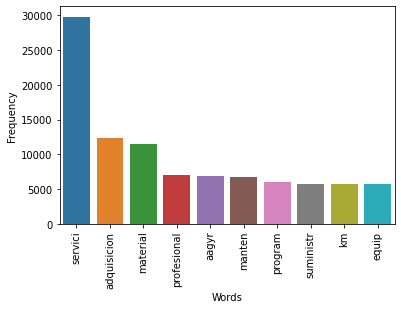

In [6]:
plot_freq(freq_dict)

In [7]:
def word_in_bag(word, bag):
    '''
    Return the evaluation if the word is contained in the bag (1) or not (0).
    '''
    if word in bag:
        return 1
    else:
        return 0

In [8]:
def most_freq_words(freq_dict, data, n):
    '''
    This function creates the n most used words of the total corpus
    Input:
        freq_dict: the frequency bag of words for all the corpus
        data: the column to evaluate
        n: parameter of n most used words
    '''
    # Sort the dictionary by value of each key
    freq_dict_ = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Obtain the first n most used words
    most_used_words, _ = zip(*freq_dict_[:n])
    # Iterate over each most used word
    for word in most_used_words:
        # Apply the evaluation word_in_bag to get if the word is contained in the corpus of each row
        data['word_'+word] = data.apply(lambda row: word_in_bag(word,row['Descripción del Anuncio']),axis=1)

    return data

In [9]:
df = most_freq_words(freq_dict, df, 3)

In [10]:
df

,Carácter del procedimiento,Forma del procedimiento,Artículo de excepción,Título del expediente,Plantilla del expediente,Descripción del Anuncio,Nombre de la UC,Entidad federativa,Tipo de contratación,Publicación del anuncio,Vigencia del anuncio,Fecha de creación,Fecha de última modificacion,Dirección del anuncio,word_servici,word_adquisicion,word_material
0,Nacional,Presencial,NaN,"[mejor, iluminacion, iglesi, san, miguel]",V20150817 30. Licitación Pública Nacional de O...,"[mejor, iluminacion, iglesi, san, miguel]",QROO-Cozumel-Dirección de Obras Públicas #8230...,Sur,Obra Publica,2020-08-10 12:49,2011-08-17 07:00,2011/07/2910:40,2020/08/31 12:51,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
1,Nacional,Presencial,NaN,"[adquisicion, uniform, direccion, segur, publi...",V20150817 28. Licitación Pública Nacional de A...,"[adquisicion, uniform, direccion, segur, publi...",QROO-Cozumel-Dirección de Obras Públicas #8230...,Sur,Adquisiciones,2020-08-14 11:19,2011-08-17 12:00,2011/08/0112:14,2020/08/18 11:32,https://compranet.funcionpublica.gob.mx/esop/g...,0,1,0
2,nan,nan,Art. 43 s/f,"[proyect, ejecut, jardin, vecinal, coloni, amer]",06. Adjudicación Directa LOPSRM,"[proyect, ejecut, jardin, vecinal, coloni, ame...",GTO-Salamanca-DIRECCION GENERAL DE OBRAS PUBLI...,NaN,Servicios Relacionados con la OP,2020-03-20 12:35,2011-08-23 23:00,2011/08/2316:57,2020/03/24 14:26,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
3,Nacional,Mixta,Art. 43 s/f,"[construccion, deport, bicentenari]",V20151220 19. Invitación a cuando menos tres N...,"[construccion, deport, bicentenari]",MEX-Nicolás Romero-Direccion de Obras Publicas...,Centro,Obra Publica,2020-06-08 10:26,2011-09-23 11:00,2011/09/0109:55,2020/06/08 10:26,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
4,Nacional,Mixta,Art. 43 s/f,"[acondicion, centr, cultural, deport]",V20151220 19. Invitación a cuando menos tres N...,"[acondicion, centr, cultural, deport]",MEX-Nicolás Romero-Direccion de Obras Publicas...,Centro,Obra Publica,2020-06-08 10:16,2011-09-23 09:00,2011/09/0109:29,2020/06/08 10:15,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,Nacional,Mixta,Art. 42 párrafo primero,"[scn, req, , aconor, maquinari, equip, industr...",05. Adjudicación Directa LAASSP,"[maquinari, equip, industrial]",SEMAR-Dirección General Adjunta de Adquisicion...,Centro,Adquisiciones,2020-08-06 13:52,2020-07-29 23:00,2020/08/0613:26,2020/08/06 13:53,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
96118,Nacional,Presencial,Art. 41 fr. XII,"[jabon, tocador, det, polv, jabon, lavanderi]",05. Adjudicación Directa LAASSP,"[jabon, tocador, det, polv, jabon, lavanderi]",DICONSA-Dirección de Comercialización #008VSS998,Norte,Adquisiciones,2020-08-06 13:43,2020-07-15 11:00,2020/08/0613:26,2020/08/06 13:42,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
96119,Nacional,Presencial,Art. 43 s/f,"[construccion, , aul, didact, obra, exterior]",06. Adjudicación Directa LOPSRM,"[construccion, aul, didact, obra, exterior, vi...",CHIS-Instituto de la Infraestructura Física Ed...,Pacifico Sur,Obra Publica,2020-08-06 13:32,2020-07-24 13:00,2020/08/0613:27,2020/08/06 13:31,https://compranet.funcionpublica.gob.mx/esop/g...,0,0,0
96120,Nacional,Presencial,Art. 41 fr. XI,"[adquisicion, muebl, mader]",05. Adjudicación Directa LAASSP,"[adquisicion, muebl, mader]",INPI-Dirección de Adquisiciones y Obra Pública...,Centro,Adquisiciones,2020-08-12 13:55,2020-07-30 09:00,2020/08/0613:28,2020/09/02 09:15,https://compranet.funcionpublica.gob.mx/esop/g...,0,1,0


In [11]:
# Save the object in a python file\n",
import pickle

with open('df2.data','wb') as data:
    pickle.dump(df, data)